# Hypothesis_test_on_kidney_disease_dataset

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [43]:
pd.set_option('display.max_columns',None)

In [44]:
df=pd.read_csv('kidney_disease_train.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,157,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,122.0,42.0,1.7,136.0,4.7,12.6,39.0,7900,3.9,yes,yes,no,good,no,no,ckd
1,109,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,233.0,50.1,1.9,NaN,NaN,11.7,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
2,17,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,114.0,87.0,5.2,139.0,3.7,12.1,NaN,NaN,NaN,yes,no,no,poor,no,no,ckd
3,347,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,108.0,25.0,1.0,144.0,5.0,17.8,43.0,7200,5.5,no,no,no,good,no,no,notckd
4,24,42.0,100.0,1.015,4.0,0.0,normal,abnormal,notpresent,present,NaN,50.0,1.4,129.0,4.0,11.1,39.0,8300,4.6,yes,no,no,poor,no,no,ckd


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              280 non-null    int64  
 1   age             275 non-null    float64
 2   bp              271 non-null    float64
 3   sg              244 non-null    float64
 4   al              245 non-null    float64
 5   su              242 non-null    float64
 6   rbc             173 non-null    object 
 7   pc              230 non-null    object 
 8   pcc             276 non-null    object 
 9   ba              276 non-null    object 
 10  bgr             247 non-null    float64
 11  bu              266 non-null    float64
 12  sc              268 non-null    float64
 13  sod             213 non-null    float64
 14  pot             212 non-null    float64
 15  hemo            241 non-null    float64
 16  pcv             229 non-null    float64
 17  wc              203 non-null    obj

In [46]:
df.describe(percentiles=(0.01,0.05,0.1,0.25,0.5,0.75,0.90,0.99)).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
id,280.0,202.928571,111.988168,1.000,5.580,23.95,43.90,110.50,202.00,302.25,354.200,393.840,399.000
age,275.0,51.454545,17.476176,2.000,5.480,19.10,26.40,42.00,55.00,65.00,71.600,80.260,90.000
bp,271.0,76.051661,14.256289,50.000,50.000,60.00,60.00,70.00,70.00,80.00,90.000,113.000,180.000
sg,244.0,1.017439,0.005746,1.005,1.005,1.01,1.01,1.01,1.02,1.02,1.025,1.025,1.025
al,245.0,1.024490,1.375805,0.000,0.000,0.00,0.00,0.00,0.00,2.00,3.000,4.000,5.000
su,242.0,0.438017,1.073193,0.000,0.000,0.00,0.00,0.00,0.00,0.00,2.000,4.000,5.000
bgr,247.0,150.186235,77.357144,70.000,71.840,80.30,87.60,100.00,124.00,171.50,250.400,436.880,490.000
bu,266.0,56.983835,51.456635,10.000,15.000,17.00,19.00,27.25,41.00,64.75,114.500,264.800,391.000
sc,268.0,3.006157,5.850085,0.400,0.500,0.50,0.60,0.90,1.30,2.80,6.430,19.980,76.000
sod,213.0,137.255869,11.677123,4.500,113.120,124.60,130.00,135.00,138.00,141.00,147.000,150.000,163.000


In [47]:
df.classification.value_counts()

ckd       174
notckd    106
Name: classification, dtype: int64

In [48]:
df_ckd=df[df['classification']=='ckd']

In [49]:
df_ckd.shape

(174, 26)

In [50]:
df_ckd.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,157,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,122.0,42.0,1.7,136.0,4.7,12.6,39.0,7900,3.9,yes,yes,no,good,no,no,ckd
1,109,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,233.0,50.1,1.9,NaN,NaN,11.7,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
2,17,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,114.0,87.0,5.2,139.0,3.7,12.1,NaN,NaN,NaN,yes,no,no,poor,no,no,ckd
4,24,42.0,100.0,1.015,4.0,0.0,normal,abnormal,notpresent,present,NaN,50.0,1.4,129.0,4.0,11.1,39.0,8300,4.6,yes,no,no,poor,no,no,ckd
5,175,60.0,50.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,261.0,58.0,2.2,113.0,3.0,NaN,NaN,4200,3.4,yes,no,no,good,no,no,ckd


In [51]:
df_ckd.describe(percentiles=(0.01,0.05,0.1,0.25,0.5,0.75,0.90,0.99)).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
id,174.0,130.040230,71.213134,1.000,3.460,13.65,28.30,67.25,135.500,190.750,221.70,244.270,249.000
age,169.0,55.000000,17.550946,2.000,3.680,12.20,33.80,48.00,60.000,66.000,72.00,81.640,90.000
bp,167.0,79.161677,16.110057,50.000,50.000,60.00,60.00,70.00,80.000,90.000,100.00,126.800,180.000
sg,141.0,1.013723,0.004448,1.005,1.005,1.01,1.01,1.01,1.015,1.015,1.02,1.025,1.025
al,142.0,1.767606,1.397391,0.000,0.000,0.00,0.00,0.25,2.000,3.000,4.00,4.000,5.000
su,139.0,0.762590,1.327429,0.000,0.000,0.00,0.00,0.00,0.000,1.000,3.00,4.620,5.000
bgr,147.0,178.646259,88.556677,70.000,74.920,84.60,92.00,110.50,157.000,219.500,297.40,455.640,490.000
bu,166.0,71.570482,60.079167,15.000,15.000,19.00,22.00,32.00,52.500,89.750,147.00,313.550,391.000
sc,167.0,4.304491,7.106767,0.600,0.666,0.83,1.00,1.40,2.300,4.200,9.66,26.720,76.000
sod,112.0,133.334821,14.314264,4.500,104.990,121.10,125.10,131.00,135.000,139.000,141.00,146.890,163.000


## Claim 1

### Hypothesis definition

***
There is claim that the average age of patient who has chronic kidney disease is more that 50.   
So, we have to collect samples out of the dataset and apply Z-test to come to a conclusion
- H0 : Average age of patients having chronic kidney disease is less than or equal to 50. (Mu <= 50)
- H1 : Average age of patients having chronic kidney disease is more than 50. (Mu > 50)
***

### Distribution of population Age

<AxesSubplot:xlabel='age', ylabel='Density'>

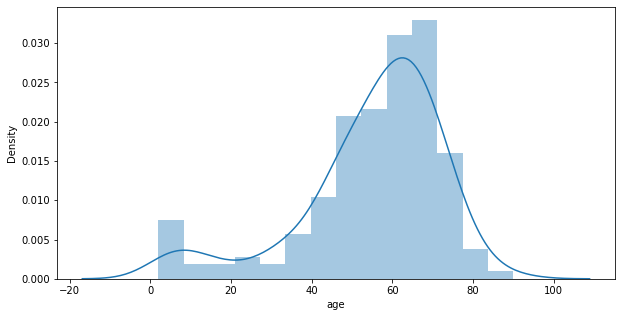

In [55]:
plt.figure(figsize=(10,5))
sns.distplot(df_ckd['age'])

The polpulation age having chronic kidney disease is not normally distributed.

### Distribution of samples mean of age

[55.43, 53.69, 57.17, 51.03, 59.42, 53.76, 54.56, 52.89, 53.33, 54.21, 54.74, 55.84, 55.6, 56.04, 55.65, 56.45, 56.75, 58.19, 51.56, 53.48, 53.57, 55.49, 54.08, 57.02, 52.57, 53.26, 53.9, 55.66, 58.36, 54.47, 56.03, 55.54, 55.6, 55.28, 56.04, 55.43, 55.59, 54.16, 53.84, 57.73, 55.54, 56.82, 52.11, 54.79, 53.91, 54.64, 54.57, 56.46, 55.55, 56.12, 53.22, 56.12, 56.01, 55.95, 54.84, 53.07, 56.15, 56.47, 57.64, 56.36, 57.38, 51.57, 54.38, 54.31, 55.16, 55.63, 56.35, 52.5, 54.97, 54.75, 54.33, 51.53, 52.74, 55.81, 54.47, 55.06, 55.43, 54.88, 56.97, 57.14, 54.22, 54.82, 52.23, 52.35, 54.11, 50.22, 55.81, 52.74, 54.59, 56.46, 54.36, 53.6, 56.7, 56.4, 55.54, 55.69, 56.36, 52.21, 56.13, 57.3]


<AxesSubplot:ylabel='Density'>

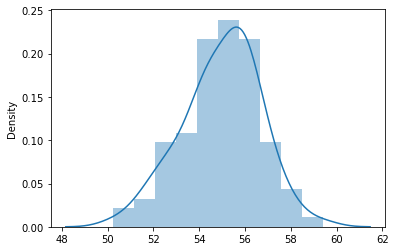

In [77]:
sample_mean_list=[]
for i in range(100):
    sample_mean_list.append(np.random.choice(df_ckd['age'][df_ckd['age'].notna()],100).mean())
print(sample_mean_list)
sns.distplot(sample_mean_list)

***
- 100 age samples of sample size 100 are picked randomly from the dataset.   
- Mean of each sample is appended to list and plotted distribution.   
- According CLT distribution of sample mean is normal.   
***

### Z-test

In [100]:
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.weightstats import zconfint

#******Hypothesis definition*******
# H0 : Mue<=50
# H1 : Mue>50

mean_h0=50
ztest_score,p_value=ztest(sample_mean_list,value=mean_h0,alternative='larger')

print('p value is : ',p_value)
print('ztest score is : ',ztest_score)

#***** 95% confidence level*****
min_val,max_val=zconfint(sample_mean_list,value=0,alpha=0.05,alternative='two-sided')
print(f'With 95% confidence avearage age will lie between {min_val} and {max_val}')

#***** 99% confidence level*****
min_val,max_val=zconfint(sample_mean_list,value=0,alpha=0.01,alternative='two-sided')
print(f'With 99% confidence avearage age will lie between {min_val} and {max_val}')

p value is :  3.075888826448444e-185
ztest score is :  29.002315381245296
With 95% confidence avearage age will lie between 54.633663329957095 and 55.30533667004293
With 99% confidence avearage age will lie between 54.52813580008293 and 55.41086419991709


### Inference

***
From above ztest we can infer,
- P-value is almost near to zero which is less than critcal value (alpha) i.e 0.05
- Hence we can reject the null hypothesis which indicates that the average age of patients having chronic kidney disease is more than 50.
- And also with 95% confidence level we can say that the average age will lie between the range 54.63 and 55.30.
- And also with 99% confidence level we can say that the average age will lie between the range 54.52 and 55.41.
***

## Claim 2

### Hypothesis definition

***
There is claim that the average bp of patient who has chronic kidney disease is more than that of not having chronic kidney disease.   
So, we have to collect samples out of the dataset and apply Z-test to come to a conclusion
- H0 : Average bp of patients having chronic kidney disease is less than or equal to that of not having chronic kidney disease. (Mu_ckd <= Mu_nckd)
- H1 : Average bp of patients having chronic kidney disease is more than that of not having chronic kidney disease. (Mu_ckd > Mu_nckd)
***

### Distribution of bp of patients having chronic kidney disease

<AxesSubplot:xlabel='bp', ylabel='Density'>

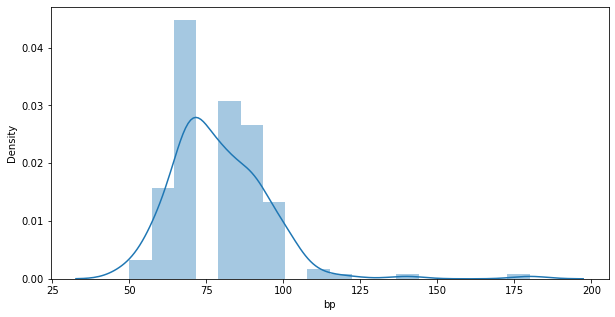

In [105]:
plt.figure(figsize=(10,5))
sns.distplot(df_ckd['bp'])

### Distribution of bp of patients not having chronic kidney disease

In [106]:
df_nckd=df[df['classification']=='notckd']

In [107]:
df_nckd.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,347,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,108.0,25.0,1.0,144.0,5.0,17.8,43.0,7200,5.5,no,no,no,good,no,no,notckd
6,351,29.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,83.0,49.0,0.9,139.0,3.3,17.5,40.0,9900,4.7,no,no,no,good,no,no,notckd
7,332,34.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,NaN,33.0,1.0,150.0,5.0,15.3,44.0,10500,6.1,no,no,no,good,no,no,notckd
10,311,56.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,132.0,18.0,1.1,147.0,4.7,13.7,45.0,7500,5.6,no,no,no,good,no,no,notckd
12,258,42.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,98.0,20.0,0.5,140.0,3.5,13.9,44.0,8400,5.5,no,no,no,good,no,no,notckd


<AxesSubplot:xlabel='bp', ylabel='Density'>

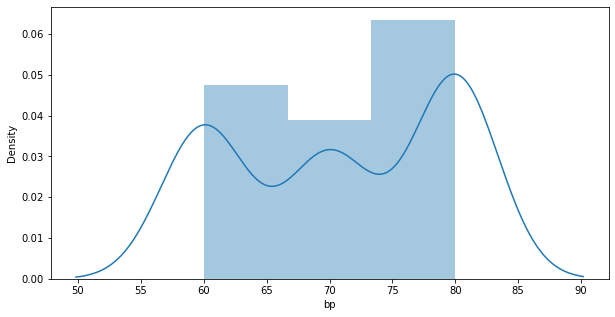

In [108]:
plt.figure(figsize=(10,5))
sns.distplot(df_nckd['bp'])

***
Distribution of bp of patients having chronic kidney disease and not having both are not normal.   
So, we will pick 100 sample from both with sample size 100.
***

[80.3, 79.1, 80.1, 83.0, 76.2, 78.8, 81.0, 77.7, 80.3, 79.3, 79.1, 81.0, 79.0, 78.7, 79.5, 80.7, 79.4, 83.3, 77.4, 80.1, 78.6, 77.9, 77.9, 79.9, 76.9, 78.1, 83.6, 79.6, 78.2, 75.4, 77.5, 76.3, 79.9, 79.0, 77.3, 79.0, 81.7, 78.2, 80.1, 80.8, 78.1, 79.3, 80.3, 82.6, 79.2, 80.0, 78.5, 78.7, 79.0, 80.5, 77.7, 80.6, 78.9, 81.7, 79.6, 79.8, 79.6, 79.6, 78.4, 77.0, 80.1, 79.9, 79.6, 80.1, 80.7, 78.7, 78.0, 77.2, 80.9, 79.5, 80.1, 79.3, 80.1, 78.9, 81.3, 79.8, 81.0, 78.6, 75.9, 79.6, 79.4, 80.1, 80.7, 81.6, 79.0, 79.6, 77.4, 81.1, 78.1, 78.9, 81.3, 75.7, 78.0, 79.5, 76.7, 76.9, 79.6, 78.5, 78.4, 78.8]


<AxesSubplot:ylabel='Density'>

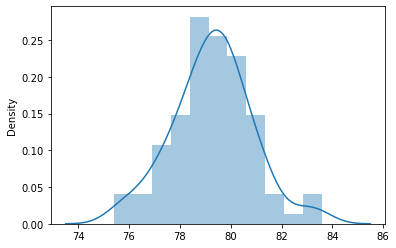

In [148]:
sample_list_ckd=[]
for i in range (100):
    sample_list_ckd.append(np.random.choice(df_ckd[df_ckd['bp'].notna()]['bp'],100).mean())
print(sample_list_ckd)
sns.distplot(sample_list_ckd)

Distribution of mean of sample of bp of patients having chronic kidney disease is normal

[71.7, 71.4, 71.5, 70.8, 70.5, 71.8, 71.6, 71.5, 70.8, 71.8, 70.3, 70.9, 70.7, 70.1, 71.1, 72.2, 70.3, 73.5, 70.1, 70.0, 70.2, 70.0, 71.4, 71.9, 72.4, 70.7, 71.0, 70.7, 71.6, 70.6, 72.5, 71.2, 70.6, 70.4, 72.0, 71.8, 70.3, 69.4, 73.2, 70.9, 71.2, 71.4, 72.0, 71.3, 72.0, 71.8, 71.5, 73.2, 71.4, 70.2, 70.8, 71.1, 71.5, 71.7, 71.2, 70.3, 71.1, 71.9, 70.6, 70.9, 70.6, 71.2, 70.1, 72.3, 72.4, 71.9, 70.1, 70.8, 71.0, 71.6, 70.8, 71.9, 72.0, 71.5, 69.2, 70.4, 71.5, 71.6, 71.8, 70.9, 72.8, 70.8, 71.6, 72.7, 71.5, 70.4, 71.5, 70.3, 71.3, 71.6, 70.7, 70.9, 71.6, 71.8, 70.4, 70.7, 71.5, 71.6, 71.1, 70.7]


<AxesSubplot:ylabel='Density'>

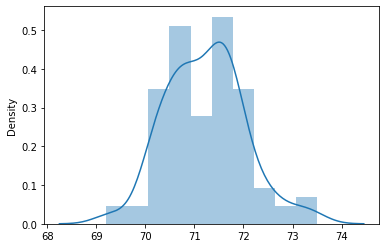

In [149]:
sample_list_nckd=[]
for i in range (100):
    sample_list_nckd.append(np.random.choice(df_nckd[df_nckd['bp'].notna()]['bp'],100).mean())
print(sample_list_nckd)
sns.distplot(sample_list_nckd)

Distribution of mean of sample of bp of patients not having chronic kidney disease is normal

### Z-test

In [153]:
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.weightstats import zconfint

#******Hypothesis definition*******
# H0 : (Mu_ckd <= Mu_nckd)
# H1 : (Mu_ckd > Mu_nckd)

ztest_score,p_value=ztest(x1=sample_list_ckd,x2=sample_list_nckd,value=0,alternative='two-sided')

print('p value is : ',p_value)
print('ztest score is : ',ztest_score)

#***** 95% confidence level*****
min_val,max_val=zconfint(sample_list_ckd,value=0,alpha=0.05,alternative='two-sided')
print(f'With 95% confidence avearage bp of patients having ckd will lie between {min_val} and {max_val}')

#***** 95% confidence level*****
min_val,max_val=zconfint(sample_list_nckd,value=0,alpha=0.05,alternative='two-sided')
print(f'With 95% confidence avearage bp of patients not having ckd will lie between {min_val} and {max_val}')

p value is :  0.0
ztest score is :  45.558783945373726
With 95% confidence avearage bp of patients having ckd will lie between 78.96640163238284 and 79.58559836761718
With 95% confidence avearage bp of patients not having ckd will lie between 71.05985458728668 and 71.37214541271334


### Inference

***
From above ztest we can infer,
- P-value is zero which is less than critcal value (alpha) i.e 0.05
- Hence we can reject the null hypothesis which indicates that the average bp of patients having chronic kidney disease is more than that of not having chronic kidney disease.
- And also with 95% confidence level we can say that the average bp of patients having chronic kidney disease will lie between the range 78.96 and 79.58.
- And also with 99% confidence level we can say that the average bp of patients not having chronic kidney disease  will lie between the range 71.05 and 71.37.
***